In [1]:
import pandas as pd
import os

import numpy as np
import matplotlib.pyplot as plt

import os
from astropy.io import fits
import astropy.units as u
from astropy.table import Table, vstack
import astropy
from astropy.coordinates import SkyCoord
import getpass

import lsst.afw.display as afwDisplay
import lsst.afw.geom as afwGeom
import lsst.afw.image as afwImage
from lsst.daf.butler import Butler
import lsst.geom as geom


In [2]:
afwDisplay.setDefaultBackend('matplotlib')
plt.style.use('tableau-colorblind10')

In [3]:
my_collection_identifier = 'test_512025_1_t4026p15y2022'
print(my_collection_identifier)

user = os.getenv("USER")
print(user)

my_outputCollection = f"u/{user}_pm/{my_collection_identifier}" 
print('Name of new butler collection for my output: ', my_outputCollection)

test_512025_1_t4026p15y2022
taceroc
Name of new butler collection for my output:  u/taceroc_pm/test_512025_1_t4026p15y2022


In [4]:
repo = '/global/cfs/cdirs/lsst/production/gen3/DC2/Run2.2i/repo'

In [5]:
butler = Butler(repo, collections=my_outputCollection)

In [6]:
calexp_tp = list(butler.registry.queryDatasets('calexp', where=f"skymap='DC2' AND tract=4026 AND patch=15"))

In [7]:
len(calexp_tp)

706

In [8]:
calexo_tp = list(butler.registry.queryDataIds(
    ["tract", "patch", "visit", "detector"],
    instrument="LSSTCam-imSim",
    datasets="calexp",
    collections=my_outputCollection,
    where=f"skymap='DC2' AND tract=4026 AND patch=15"))

In [9]:
len(calexo_tp)

706

In [10]:
calexo_tp[0]

{instrument: 'LSSTCam-imSim', skymap: 'DC2', detector: 47, tract: 4026, patch: 15, visit: 219950, band: 'r', day_obs: 20221024, physical_filter: 'r_sim_1.4'}

In [11]:
calexp_list = list(butler.registry.queryDatasets('calexp', collections=my_outputCollection))

In [12]:
len(calexp_list)

448

In [13]:
calexo = list(butler.registry.queryDataIds(
    ["tract", "patch", "visit", "detector"],
    instrument="LSSTCam-imSim",
    datasets="calexp",
    collections=my_outputCollection,))

In [14]:
len(calexo)

4548

In [15]:
tracts = [kdx['tract'] for kdx in calexo]

In [16]:
np.unique(tracts)

array([4026, 4027])

In [17]:
patches = [kdx['patch'] for kdx in calexo]

In [18]:
np.unique(patches)

array([ 0,  1,  2,  3,  6,  7,  8,  9, 10, 13, 14, 15, 16, 17, 19, 20, 21,
       22, 23, 24, 27, 28, 29, 30, 31, 34])

In [19]:
calexp = butler.get('calexp', dataId=calexp_list[10].dataId)

In [21]:
calexp.getWcs()

FITS standard SkyWcs:
Sky Origin: (57.7427891991, -35.0212204182)
Pixel Origin: (2055.09, 2093.96)
Pixel Scale: 0.199772 arcsec/pixel

In [22]:
calexp.getBBox()

Box2I(corner=Point2I(0, 0), dimensions=Extent2I(4072, 4000))

In [20]:
calexp_list[10].dataId

{instrument: 'LSSTCam-imSim', detector: 119, visit: 12482, band: 'y', day_obs: 20220117, physical_filter: 'y_sim_1.4'}

In [29]:
calexp_gband = [ids for ids in calexo_tp if ids['band'] == 'g']

In [30]:
len(calexp_gband)

77

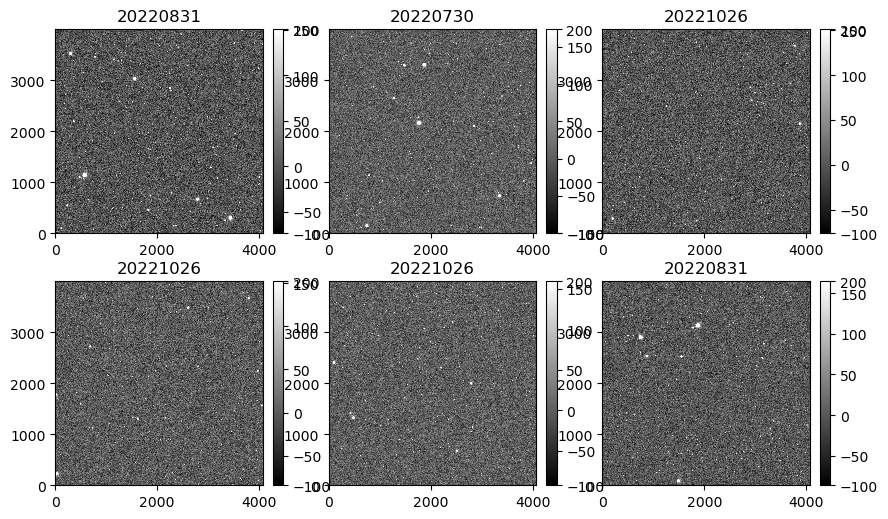

In [31]:
fig, ax = plt.subplots(2,3, figsize=(10, 6))
ax = ax.ravel()
for jdx in range(len(ax)):
    calexp = butler.get('calexp', dataId=calexp_gband[jdx])
    plt.sca(ax[jdx])
    display0 = afwDisplay.Display(frame=fig)
    display0.scale('linear', 'zscale')
    # display0.scale('linear', min=-20, max=150)
    display0.mtv(calexp.image)
    plt.title(f'{calexp_gband[jdx]["day_obs"]}')

In [ ]:
# visitTableRef = list(butler.registry.queryDatasets('visitTable'))
calexo_tp_visittable = list(butler.registry.queryDataIds(
    ["tract", "patch", "visit", "detector"],
    instrument="LSSTCam-imSim",
    datasets="visitTable",
    collections=my_outputCollection))

In [ ]:
len(calexo_tp_visittable)

In [ ]:
visitTable = pd.DataFrame()
for v in visitTableRef:
    visitTable_uni = calexp_butler.get(v)
    visitTable_uni = visitTable_uni[visitTable_uni['band'] == 'g']
    visitTable = pd.concat([visitTable,visitTable_uni])

In [50]:
visits = [kdx['visit'] for kdx in calexp_gband]

In [54]:
np.argmax(np.unique(visits, return_counts=True)[1])

5

In [55]:
np.unique(visits, return_counts=True)[0][5]

221574

In [56]:
same_detectors = [kdx for kdx in calexp_gband if kdx['visit'] == 221574 ]
same_detectors

[{instrument: 'LSSTCam-imSim', skymap: 'DC2', detector: 127, tract: 4026, patch: 15, visit: 221574, band: 'g', day_obs: 20221026, physical_filter: 'g_sim_1.4'},
 {instrument: 'LSSTCam-imSim', skymap: 'DC2', detector: 126, tract: 4026, patch: 15, visit: 221574, band: 'g', day_obs: 20221026, physical_filter: 'g_sim_1.4'},
 {instrument: 'LSSTCam-imSim', skymap: 'DC2', detector: 88, tract: 4026, patch: 15, visit: 221574, band: 'g', day_obs: 20221026, physical_filter: 'g_sim_1.4'},
 {instrument: 'LSSTCam-imSim', skymap: 'DC2', detector: 87, tract: 4026, patch: 15, visit: 221574, band: 'g', day_obs: 20221026, physical_filter: 'g_sim_1.4'},
 {instrument: 'LSSTCam-imSim', skymap: 'DC2', detector: 119, tract: 4026, patch: 15, visit: 221574, band: 'g', day_obs: 20221026, physical_filter: 'g_sim_1.4'},
 {instrument: 'LSSTCam-imSim', skymap: 'DC2', detector: 80, tract: 4026, patch: 15, visit: 221574, band: 'g', day_obs: 20221026, physical_filter: 'g_sim_1.4'},
 {instrument: 'LSSTCam-imSim', skymap

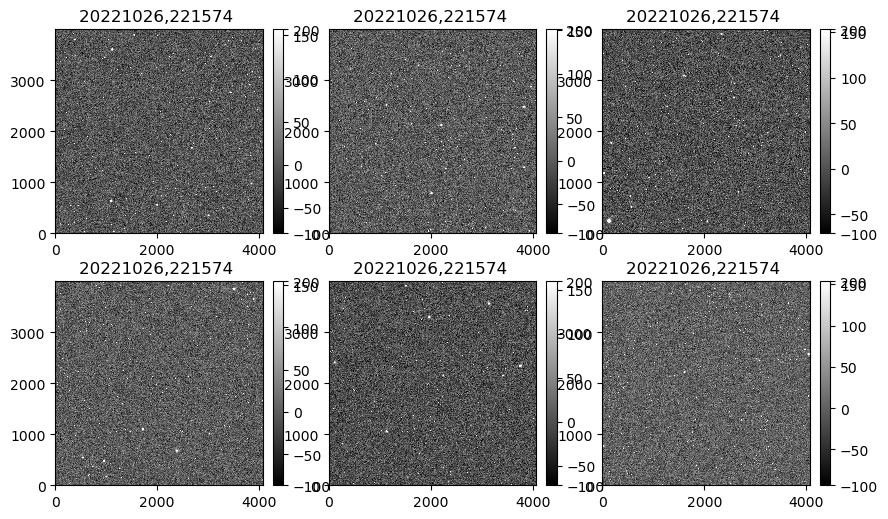

In [57]:
fig, ax = plt.subplots(2,3, figsize=(10, 6))
ax = ax.ravel()
for jdx in range(len(ax)):
    calexp = butler.get('calexp', dataId=same_detectors[jdx])
    plt.sca(ax[jdx])
    display0 = afwDisplay.Display(frame=fig)
    display0.scale('linear', 'zscale')
    # display0.scale('linear', min=-20, max=150)
    display0.mtv(calexp.image)
    plt.title(f'{same_detectors[jdx]["day_obs"]},{same_detectors[jdx]["visit"]} ')

In [32]:
calexp_gband

[{instrument: 'LSSTCam-imSim', skymap: 'DC2', detector: 72, tract: 4026, patch: 15, visit: 183818, band: 'g', day_obs: 20220831, physical_filter: 'g_sim_1.4'},
 {instrument: 'LSSTCam-imSim', skymap: 'DC2', detector: 22, tract: 4026, patch: 15, visit: 159478, band: 'g', day_obs: 20220730, physical_filter: 'g_sim_1.4'},
 {instrument: 'LSSTCam-imSim', skymap: 'DC2', detector: 119, tract: 4026, patch: 15, visit: 221614, band: 'g', day_obs: 20221026, physical_filter: 'g_sim_1.4'},
 {instrument: 'LSSTCam-imSim', skymap: 'DC2', detector: 67, tract: 4026, patch: 15, visit: 221575, band: 'g', day_obs: 20221026, physical_filter: 'g_sim_1.4'},
 {instrument: 'LSSTCam-imSim', skymap: 'DC2', detector: 68, tract: 4026, patch: 15, visit: 221575, band: 'g', day_obs: 20221026, physical_filter: 'g_sim_1.4'},
 {instrument: 'LSSTCam-imSim', skymap: 'DC2', detector: 81, tract: 4026, patch: 15, visit: 183772, band: 'g', day_obs: 20220831, physical_filter: 'g_sim_1.4'},
 {instrument: 'LSSTCam-imSim', skymap: 

In [24]:
for jdx in range(6):
    print(calexp_gband[jdx])

{instrument: 'LSSTCam-imSim', detector: 2, visit: 193826, band: 'g', day_obs: 20220917, physical_filter: 'g_sim_1.4'}
{instrument: 'LSSTCam-imSim', detector: 16, visit: 254381, band: 'g', day_obs: 20221218, physical_filter: 'g_sim_1.4'}
{instrument: 'LSSTCam-imSim', detector: 109, visit: 221616, band: 'g', day_obs: 20221026, physical_filter: 'g_sim_1.4'}
{instrument: 'LSSTCam-imSim', detector: 84, visit: 183772, band: 'g', day_obs: 20220831, physical_filter: 'g_sim_1.4'}
{instrument: 'LSSTCam-imSim', detector: 87, visit: 221614, band: 'g', day_obs: 20221026, physical_filter: 'g_sim_1.4'}
{instrument: 'LSSTCam-imSim', detector: 126, visit: 221574, band: 'g', day_obs: 20221026, physical_filter: 'g_sim_1.4'}


In [ ]:
repo = '/global/cfs/cdirs/lsst/production/gen3/DC2/Run2.2i/repo'
collections = ["LSSTCam-imSim/defaults"]
butler = Butler(repo, collections=collections)

In [ ]:
# where = f"instrument='LSSTCam-imSim' AND skymap='DC2' AND \
#           band='g'"
raws_p = list(butler.registry.queryDatasets('raw', where=f"tract=3838 AND patch=36 AND skymap='DC2'"))

In [ ]:
day_obs_383836 = np.unique([c.dataId['day_obs'] for c in raws_p])

In [ ]:
day_obs_383836

In [ ]:
raws_p = list(butler.registry.queryDataIds(
    ["tract", "patch", "visit", "detector"],
    instrument="LSSTCam-imSim",
    datasets="raw",
    collections=collections,
    where=f"tract=3838 AND patch=36 AND skymap='DC2'"
))

In [ ]:
day_obs_383836 = np.unique([c['day_obs'] for c in raws_p])

In [ ]:
day_obs_383836

In [ ]:
len(raws_p)

In [ ]:
raws = list(butler.registry.queryDataIds(
    ["tract", "patch", "visit", "detector"],
    instrument="LSSTCam-imSim",
    datasets="raw",
    collections=collections,
    where=f"tract=4026 AND patch=15 AND skymap='DC2'"
))

In [ ]:
day_obs_402615 = np.unique([c['day_obs'] for c in raws], return_counts=True)

In [ ]:
day_obs_402615

In [ ]:
len(raws)

In [ ]:
years = [int(str(x)[:4]) for x in day_obs_402615[0]]

In [ ]:
month = [int(str(x)[4:4+2]) for x in day_obs_402615[0]]

In [ ]:
day = [int(str(x)[6:]) for x in day_obs_402615[0]]

In [ ]:
dates = pd.DataFrame([years, month, day,day_obs_402615[1] ]).T
dates.columns = ["year", "month", "day", "total_raws"]

In [ ]:
datest_group = dates.groupby(["year", "month"]).sum()

In [ ]:
datest_group

In [ ]:
dates.groupby(["year"]).sum()


In [ ]:
for yy in np.unique(dates["year"]):
    year_20yy = dates[(dates["year"] == yy) & (dates["total_raws"] > 5) ]
    dates_20yy = pd.to_datetime(year_20yy[['year', 'month', 'day']])
    dates_20yy = np.array([str(x).replace('-', '') for x in dates_20yy.dt.date], dtype=int)
    my_days_tupleString = "("+",".join(dates_20yy.astype(str))+")"
    print(yy, my_days_tupleString)
    
    

In [ ]:
year_2022 = dates[(dates["year"] == 2022) & (dates["total_raws"] > 5) ]

In [ ]:
dates_2022 = pd.to_datetime(year_2022[['year', 'month', 'day']])

In [ ]:
dates_2022 = np.array([str(x).replace('-', '') for x in dates_2022.dt.date], dtype=int)

In [ ]:
dates_2022

In [ ]:
my_days_tupleString = "("+",".join(dates_2022.astype(str))+")"
print(my_days_tupleString)

In [ ]:
raws = list(butler.registry.queryDatasets('raw', where=f"tract=4026 AND patch=15 AND skymap='DC2'"))

In [ ]:
len(raws)

In [ ]:
day_obs_402615 = np.unique([c.dataId['day_obs'] for c in raws])

In [ ]:
day_obs_402615

In [ ]:
for data_id in butler.registry.queryDataIds(
    ["tract", "patch", "visit", "detector"],
    instrument="LSSTCam-imSim",
    datasets="raw",
    collections=collections,
    where=f"skymap='DC2' AND day_obs in (20220101,20230101,20240101,20250101)"
).limit(50):
    print(data_id)

In [ ]:
for data_id in butler.registry.queryDataIds(
    ["tract", "patch", "visit", "detector"],
    instrument="LSSTCam-imSim",
    datasets="raw",
    collections=collections,
    where=f"skymap='DC2' AND band='g' AND tract=4026 AND patch=15"
).limit(50):
    print(data_id)

In [ ]:
raws = list(butler.registry.queryDatasets('raw', where="tract = 3838 AND patch = 36 AND skymap = 'DC2'"))

In [ ]:
day_obds = [x['day_obs'] for x in list(calexp_butler.registry.queryDataIds(
    ["tract", "visit", "detector", "patch"],
    instrument="LSSTCam-imSim",
    datasets="calexp",
    collections=collections, where=f"skymap='DC2' AND band='g' AND tract=4849 AND patch=31"# AND detector=132 AND visit=250"#AND day_obs=20220101"
))]

In [52]:
repo = '/global/cfs/cdirs/lsst/production/gen3/DC2/Run2.2i/repo'
my_outputCollection = 'u/taceroc_pm/test_512025_1_t4026p15y2022_coadd_582025_1_202201-02'
butler = Butler(repo, collections=my_outputCollection)

In [53]:
coadd_list = list(butler.registry.queryDatasets('deepCoadd', where="tract = 4026 AND patch = 15 AND skymap = 'DC2'"))

In [54]:
deepCoadd_test = butler.get(coadd_list[0])

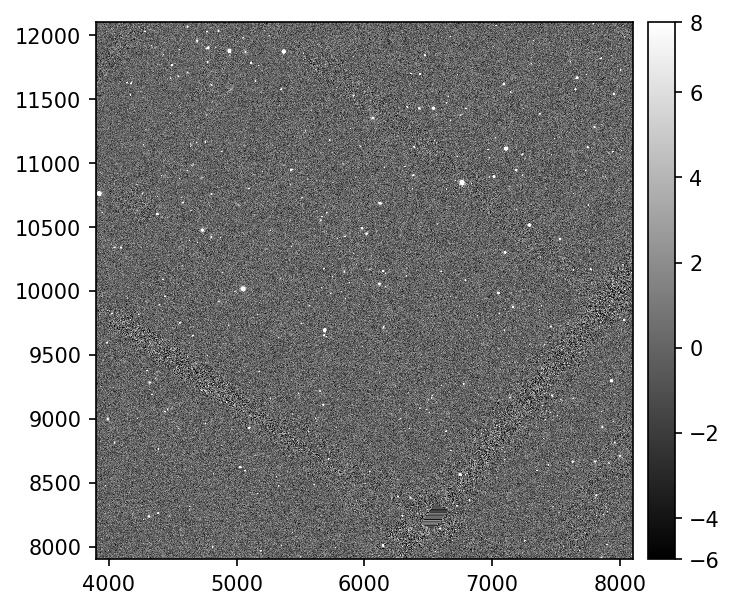

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=150)

display2 = afwDisplay.Display(frame=fig)
display2.scale('linear', 'zscale')
# display2.scale('linear', min=-20, max=150)
display2.mtv(deepCoadd_test.image)
wcs = deepCoadd_test.getWcs()
# center = wcs.skyToPixel(geom.SpherePoint(ra, dec))

plt.tight_layout()
plt.show()

In [37]:
repo = '/global/cfs/cdirs/lsst/production/gen3/DC2/Run2.2i/repo'
my_outputCollection = 'u/taceroc_pm/test_512025_1_t4026p15y2022_coadd_582025_1_202202-07'
butler = Butler(repo, collections=my_outputCollection)

In [38]:
coadd_list = list(butler.registry.queryDatasets('deepCoadd', where="tract = 4026 AND patch = 15 AND skymap = 'DC2'"))

In [39]:
len(coadd_list)

1

In [40]:
deepCoadd_test = butler.get(coadd_list[0])

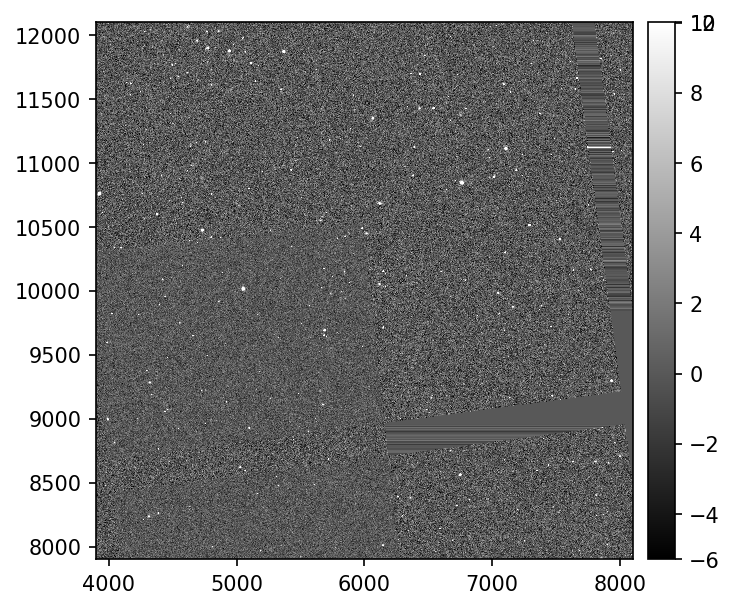

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=150)

display2 = afwDisplay.Display(frame=fig)
display2.scale('linear', 'zscale')
# display2.scale('linear', min=-20, max=150)
display2.mtv(deepCoadd_test.image)
wcs = deepCoadd_test.getWcs()
# center = wcs.skyToPixel(geom.SpherePoint(ra, dec))

plt.tight_layout()
plt.show()

In [56]:
src_refs = butler.registry.queryDatasets("deepCoadd_meas")
src_catalog = [butler.get(src_ref) for src_ref in src_refs]

In [57]:
src_catalogTable = pd.DataFrame()
for v in src_catalog:
    src_catalogTable = pd.concat([src_catalogTable,v.asAstropy().to_pandas()])

In [58]:
src_catalogTable

,id,coord_ra,coord_dec,parent,merge_footprint_i,merge_footprint_r,merge_footprint_z,merge_footprint_y,merge_footprint_g,merge_footprint_u,...,slot_ModelFlux_exp_flag_apCorr,modelfit_CModel_initial_apCorr,slot_ModelFlux_initial_apCorr,modelfit_CModel_initial_apCorrErr,slot_ModelFlux_initial_apCorrErr,modelfit_CModel_initial_flag_apCorr,slot_ModelFlux_initial_flag_apCorr,base_ClassificationExtendedness_value,base_ClassificationExtendedness_flag,base_FootprintArea_value
0,1735504337653727233,1.006289,-0.608280,0,False,False,False,True,False,False,...,False,0.993371,0.993371,0.0,0.0,False,False,NaN,True,339
1,1735504337653727234,1.005714,-0.608283,0,False,False,False,True,False,False,...,False,0.996526,0.996526,0.0,0.0,False,False,NaN,True,194
2,1735504337653727235,1.006018,-0.608275,0,False,False,False,True,False,False,...,False,0.994837,0.994837,0.0,0.0,False,False,1.0,False,334
3,1735504337653727236,1.005209,-0.608269,0,False,False,False,True,False,False,...,False,0.993217,0.993217,0.0,0.0,False,False,NaN,True,543
4,1735504337653727237,1.005795,-0.608268,0,False,False,False,True,False,False,...,False,0.996162,0.996162,0.0,0.0,False,False,0.0,False,220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,1735495541560705320,1.007315,-0.607631,1735495541560705052,False,False,False,True,False,False,...,False,0.991540,0.991540,0.0,0.0,False,False,1.0,False,449
164,1735495541560705321,1.007286,-0.607533,1735495541560705053,False,False,False,True,False,False,...,False,0.992159,0.992159,0.0,0.0,False,False,NaN,True,244
165,1735495541560705322,1.007286,-0.607502,1735495541560705054,False,False,False,True,False,False,...,False,0.992312,0.992312,0.0,0.0,False,False,NaN,True,154
166,1735495541560705323,1.007342,-0.607447,1735495541560705055,False,False,False,True,False,False,...,False,0.994912,0.994912,0.0,0.0,False,False,1.0,False,366


# FIND TRACT PATCHES OF THE DDF

In [ ]:
from lsst.geom import SpherePoint, degrees

In [ ]:
ras = [53.125, 53.764, 52.486, 53.771, 52.479]
decs = [-28.100, -27.533, -27.533, -28.667, -28.667]


In [ ]:
injection_sphere_points = [
    SpherePoint(ra, dec, units=degrees)
    for ra, dec in zip(ras, decs)
]

In [ ]:
# Get the sky map.
collections = ["LSSTCam-imSim/defaults"]
skymap = butler.get(
    "skyMap",
    collections=collections,
    skymap="DC2",
)
# Find all tract and patch overlaps.
injection_tract_patch_info = skymap.findTractPatchList(injection_sphere_points)

# Format the results into injection_tract_patch_dict.
injection_tract_patch_dict = {}
for tract_info, patch_info in injection_tract_patch_info:
    tract_id = tract_info.tract_id
    patch_ids = [patch.sequential_index for patch in patch_info]
    injection_tract_patch_dict[tract_id] = sorted(patch_ids)

In [ ]:
injection_tract_patch_dict